### 목표 : 숫자 0 ~ 9 이미지를 분류
- 데이터셋 : sklearn의 내장 데이터 사용 => load_digit
- 데이터 구성 : 이미지 데이터 + 클래스(라벨/타겟/정답) ==> 지도학습
- 학습방법 : 지도학습 중 분류
    * LogisticRegression, KNN, DecisionTree, RandomForest, SVM...
    * 분류 모델 중 하나 선택

- 구현과정
    1. 데이터 준비 + 기본적인 분석
    2. 데이터 전처리 ==> 결측치, 중복, 이상치, ..., 스케일링
    3. 학습 준비
        - 데이터 & 타겟 분리
        - 학습용 + 테스트용 + 검증용 데이터 
    4. 학습
        - 학습모델 객체 생성
        - 학습진행
    5. 평가
        - 예측 => 평가
        - 과대적합 또는 과소적합 => 교차검증 및 방법
    6. 모델 저장
        - 저장된 모델 활용

#### [1] 데이터 준비 및 확인

In [72]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler

import numpy as np
import matplotlib.pyplot as plt

#### [1-1] 데이터 로딩

In [73]:
# Bunch Type => Similar with Dictionary
digitBunch = load_digits()

In [74]:
digitBunch.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [75]:
data = digitBunch['data']
target = digitBunch['target']

In [76]:
data.shape, target.shape

((1797, 64), (1797,))

In [77]:
type(data), type(target)

(numpy.ndarray, numpy.ndarray)

In [78]:
# Check one of data => Image 8 * 8 => 64
data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [79]:
target[0]

0

In [80]:
# 시각화 => 2차원 형태
img_data = data[0]
img_data

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

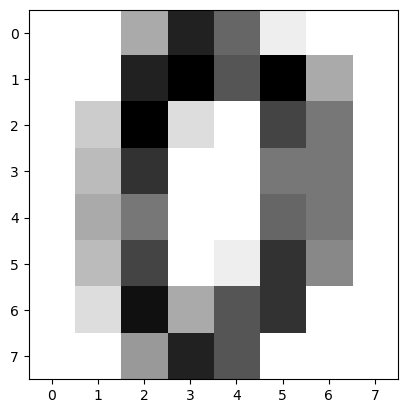

In [81]:
plt.imshow(img_data.reshape(8, 8), cmap='gray_r')

#### [2] 데이터 전처리

In [82]:
# 수치값 => 0 ~ 255 스케일링
scaled_data = data / 255

In [83]:
scaled_data.min(), scaled_data.max()

(0.0, 0.06274509803921569)

In [84]:
mmScaler = MinMaxScaler()
mmScaler.fit(data)

MinMaxScaler()

In [85]:
scaled_data = mmScaler.transform(data)

#### [3] 학습 준비

In [86]:
# 학습용 / 테스트용 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(scaled_data, target) 

In [87]:
X_train.shape, X_test.shape

((1347, 64), (450, 64))

In [88]:
y_train.shape, y_test.shape

((1347,), (450,))

#### [4] 학습

In [102]:
# 모델 객체 생성
knnModel = KNeighborsClassifier()
svcModel = SVC()

In [90]:
knnModel.fit(X_train, y_train)

KNeighborsClassifier()

In [103]:
svcModel.fit(X_train, y_train)

SVC()

In [91]:
# 학습된 모델 속성 확인
knnModel.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [104]:
svcModel.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [92]:
knnModel.n_samples_fit_

1347

#### [5] 평가

[5-1] KNN 모델

In [93]:
# 학습 데이터 평가
# X_train을 가지고 학습한 모델이 y_train에 얼마나 일치한지 확인
round(knnModel.score(X_train, y_train), 4)

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.9933

In [94]:
round(knnModel.score(X_test, y_test), 4)

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.9778

[5-2] SVC 모델

In [106]:
# 학습 데이터 평가
round(svcModel.score(X_train, y_train), 4)

0.997

In [107]:
# 테스트 데이터 평가
round(svcModel.score(X_test, y_test), 4)

0.9889

[5-3] 지도학습 분류 모델 검사

In [113]:
from sklearn.utils import *
from sklearn.metrics import *
import warnings

In [114]:
rets = all_estimators(type_filter='classifier')

In [116]:
result = []

for name, estimator_ in rets:
    try:
        model = estimator_()
        model.fit(X_train, y_train)
        sc = model.score(X_train, y_train)
        result.append((name, round(sc, 2)))
    except Exception:
        pass

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.ht

In [117]:
sorted(result, key = lambda x : x[1], reverse = True)

[('BaggingClassifier', 1.0),
 ('DecisionTreeClassifier', 1.0),
 ('ExtraTreeClassifier', 1.0),
 ('ExtraTreesClassifier', 1.0),
 ('GaussianProcessClassifier', 1.0),
 ('GradientBoostingClassifier', 1.0),
 ('HistGradientBoostingClassifier', 1.0),
 ('LabelPropagation', 1.0),
 ('LabelSpreading', 1.0),
 ('LogisticRegressionCV', 1.0),
 ('MLPClassifier', 1.0),
 ('RadiusNeighborsClassifier', 1.0),
 ('RandomForestClassifier', 1.0),
 ('SVC', 1.0),
 ('CalibratedClassifierCV', 0.99),
 ('KNeighborsClassifier', 0.99),
 ('LinearSVC', 0.99),
 ('LogisticRegression', 0.99),
 ('PassiveAggressiveClassifier', 0.98),
 ('Perceptron', 0.98),
 ('LinearDiscriminantAnalysis', 0.97),
 ('NuSVC', 0.97),
 ('SGDClassifier', 0.97),
 ('RidgeClassifier', 0.95),
 ('RidgeClassifierCV', 0.95),
 ('QuadraticDiscriminantAnalysis', 0.92),
 ('MultinomialNB', 0.91),
 ('NearestCentroid', 0.9),
 ('BernoulliNB', 0.87),
 ('GaussianNB', 0.86),
 ('ComplementNB', 0.82),
 ('CategoricalNB', 0.74),
 ('AdaBoostClassifier', 0.27),
 ('DummyCla

#### [6] 예측

In [95]:
# 새로운 데이터 (학습, 테스트 사용안함) => 64개 데이터 , 2차원
new_data = X_test[-1]
new_data, new_data.shape

(array([0.        , 0.        , 0.0625    , 0.625     , 0.875     ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.5       , 0.875     , 0.6875    , 0.1875    , 0.        ,
        0.        , 0.        , 0.        , 1.        , 0.125     ,
        0.125     , 0.        , 0.        , 0.        , 0.        ,
        0.2       , 0.8125    , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.28571429, 0.8125    ,
        0.        , 0.375     , 0.625     , 0.21428571, 0.        ,
        0.        , 0.1875    , 0.9375    , 0.8125    , 0.75      ,
        0.625     , 0.75      , 0.        , 0.        , 0.        ,
        0.625     , 1.        , 0.25      , 0.3125    , 0.875     ,
        0.        , 0.        , 0.        , 0.        , 0.5625    ,
        0.9375    , 0.875     , 0.5625    , 0.        ]),
 (64,))

In [96]:
new_data = new_data.reshape(1, -1)
new_data.shape

(1, 64)

In [97]:
# 스케일링 하기
new_ndata = mmScaler.transform(new_data)

In [98]:
# 예측 => predict()
knnModel.predict(new_data)

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


array([6])

In [99]:
knnModel.predict_proba(new_data)

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]])

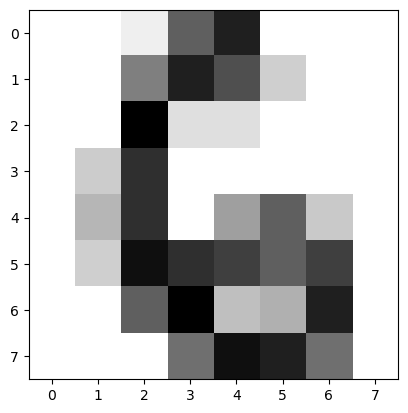

In [100]:
plt.imshow(new_data.reshape(8, 8), cmap='gray_r')